In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt
import math

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.figdir = './figures/'

#adata = sc.read_10x_mtx('./outs/raw_gene_bc_matrices_mex/GRCh38/', var_names='gene_symbols', cache=True)
#adata.write('./data/adata_afterloading.h5ad')

adata = sc.read("./data/adata_final_PC55.h5ad")
adata

scanpy==1.4 anndata==0.6.19 numpy==1.15.4 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


AnnData object with n_obs × n_vars = 109238 × 2384 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patientno', 'patient_tumorsection', 'ViralvsNonViral', 'PNC', 'PIC', 'NormalvsTumor'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [20]:
sc.settings.set_figure_params(dpi=100, color_map='viridis')

In [3]:
set(adata.obs.NormalvsTumor)

{'F1', 'F2', 'Normal', 'Tumor'}

In [4]:
adata.obs['NTF'] = adata.obs.NormalvsTumor.replace(['F1','F2'], 'Fetal')

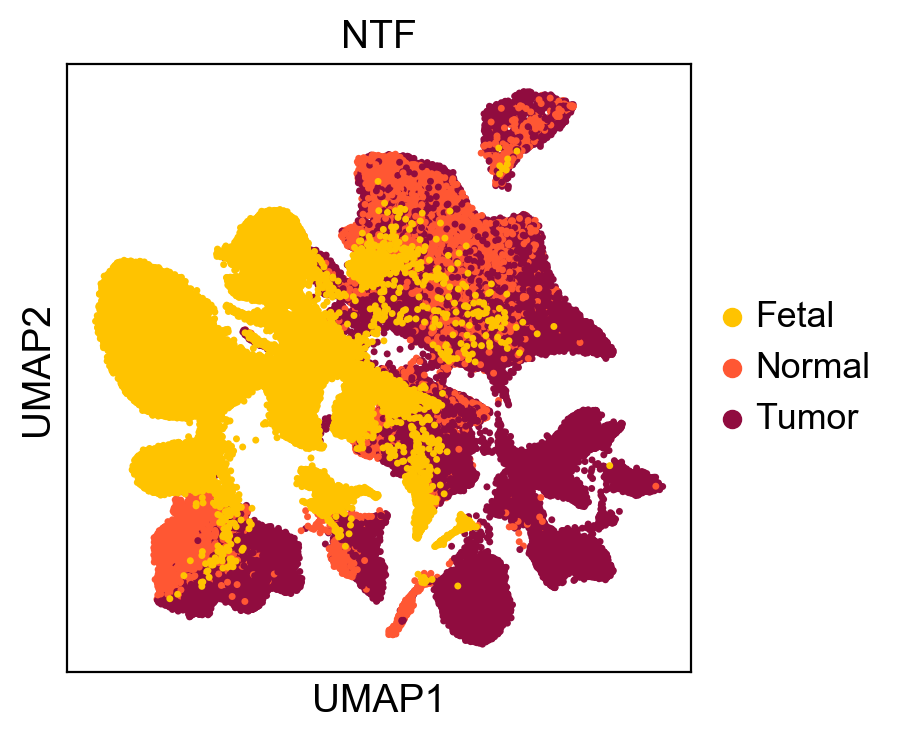

In [21]:
sc.pl.umap(adata, color='NTF', size=25, palette=['#ffc300','#ff5733','#900C3F'],)

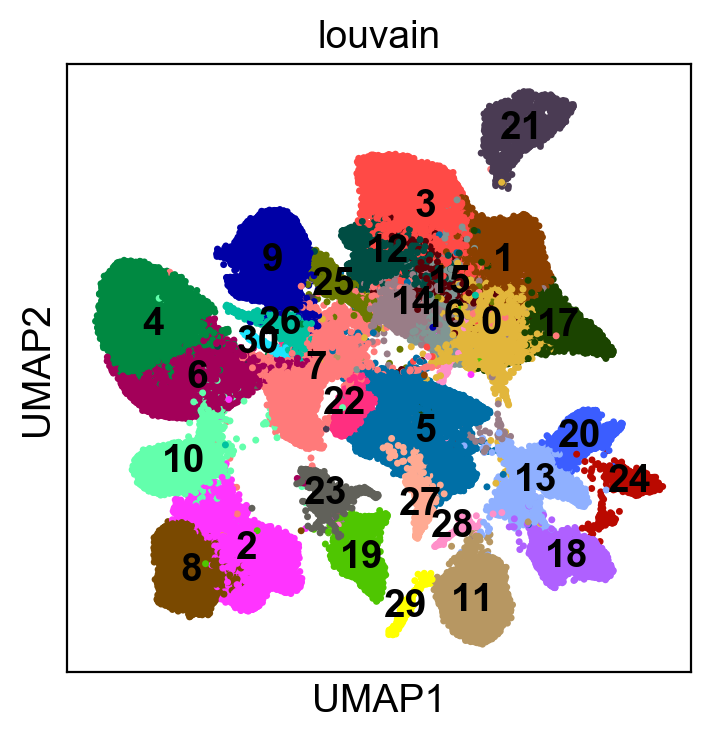

In [6]:
sc.pl.umap(adata, color='louvain', legend_loc='on data', size=25)

In [7]:
df = adata.obs.groupby(['louvain','NTF']).size().unstack().fillna(0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 1)

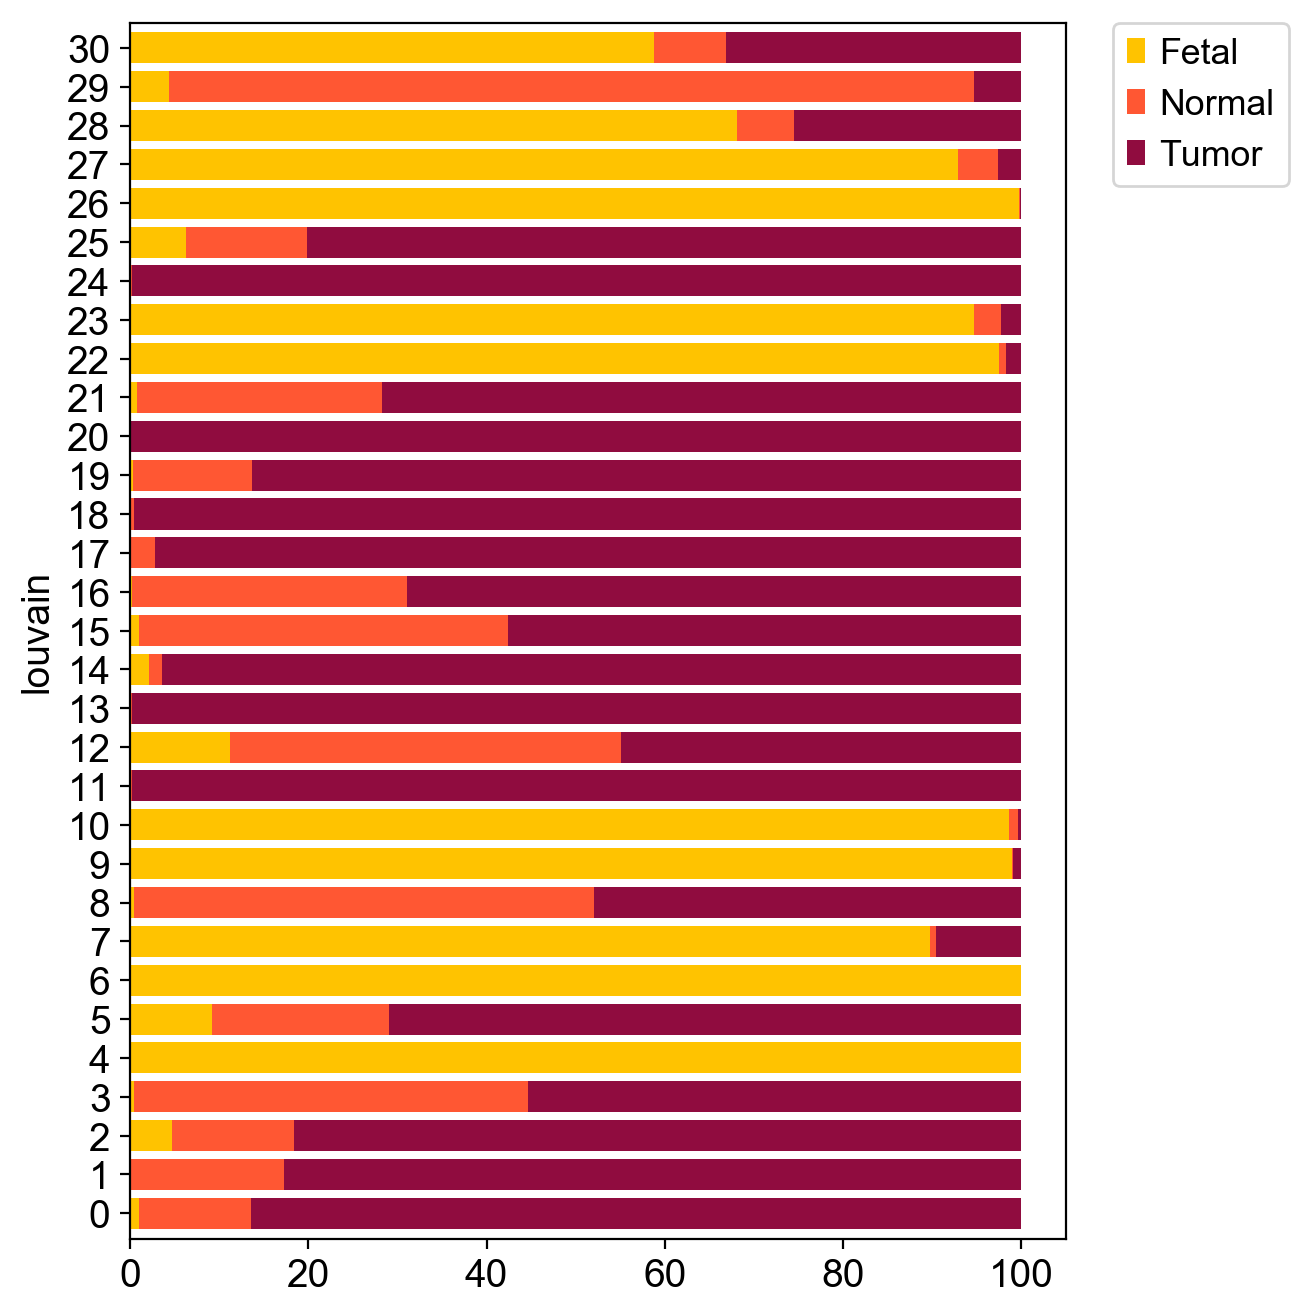

In [13]:
ax = df1.plot.barh(stacked=True, color=['#ffc300','#ff5733','#900C3F'], width=0.8)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 6
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Previous size: [4.0, 4.0]
Current size: [6, 8]


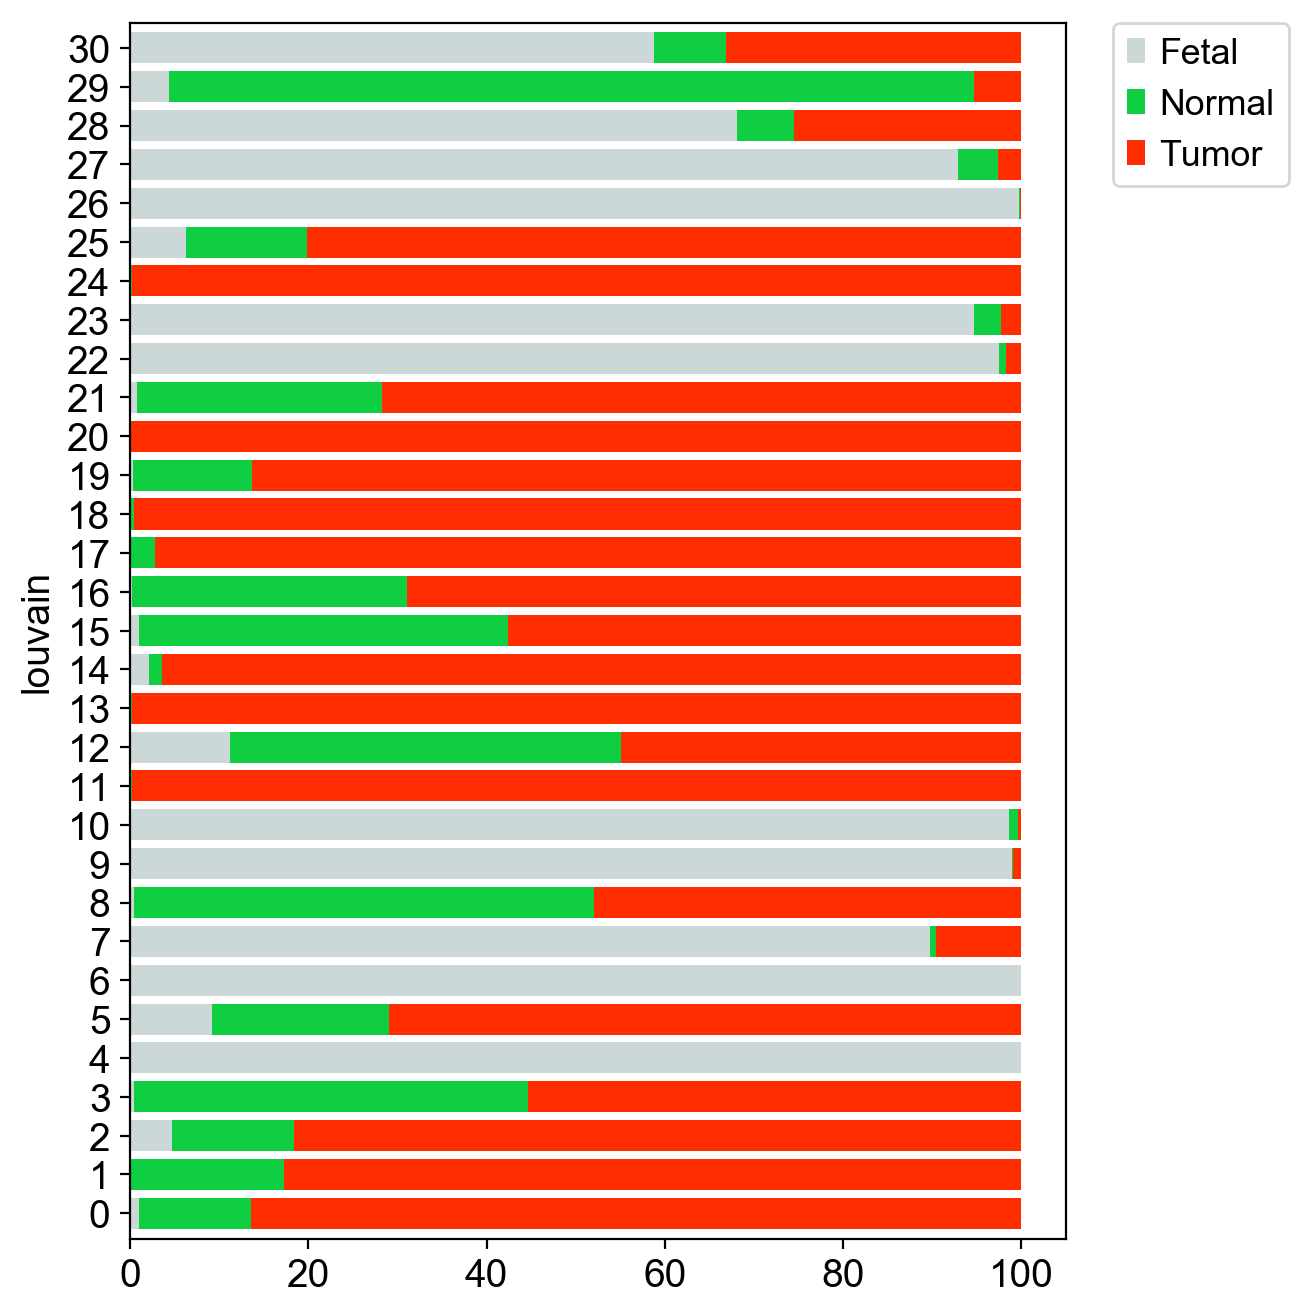

In [18]:
ax = df1.plot.barh(stacked=True, color=['#cbd8d7','#10ce42','#ff2d00'], width=0.8)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)